In [5]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Importing seaborn for data visualization


In [7]:
!pip install fredapi


In [8]:
import yfinance as yf

# Fetch historical TLT (20+ Year Treasury Bond ETF) data in daily timeframe
tlt_data = yf.download('TLT', start='2017-01-01', end='2023-12-31')

# Resample the data to get the last trading day of each year
tlt_yearly = tlt_data['Close'].resample('Y').last()

# Calculate the annual return
tlt_annual_return = tlt_yearly.pct_change() * 100

# Filter out the years to match Yahoo Finance
tlt_annual_return = tlt_annual_return[tlt_annual_return.index.year >= 2017]

# Display the annual returns
print("TLT (20+ Year Treasury Bond ETF) Annual Returns by Year:")
print(tlt_annual_return)


[*********************100%%**********************]  1 of 1 completed

TLT (20+ Year Treasury Bond ETF) Annual Returns by Year:
Date
2017-12-31          NaN
2018-12-31    -4.217246
2019-12-31    11.496991
2020-12-31    16.423089
2021-12-31    -6.048306
2022-12-31   -32.815982
2023-12-31    -0.683006
Freq: A-DEC, Name: Close, dtype: float64


# LINEAR REGRESSION

[*********************100%%**********************]  1 of 1 completed


Daily Mean Squared Error: 6.420486778420768e-09
Daily R^2 Score: 0.999913847026464
Annualized Predicted Return using linear regression: 1.54%


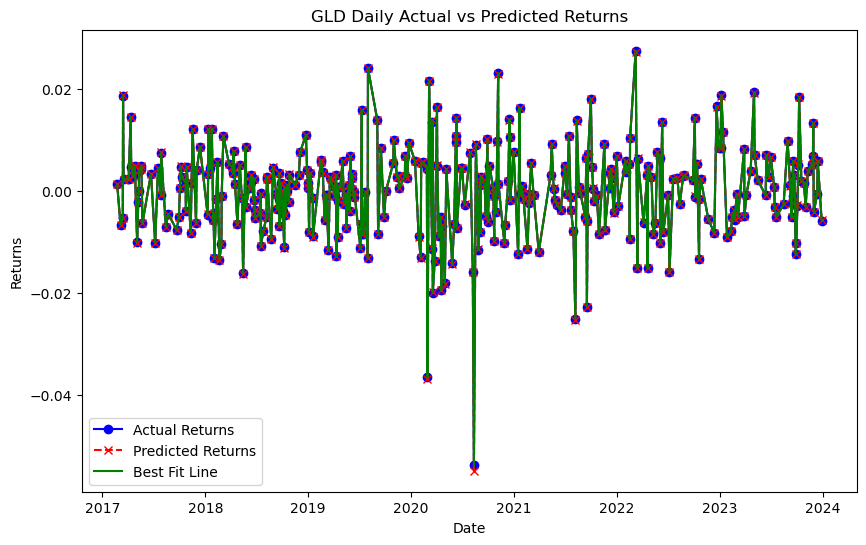

Correlation Matrix:
                  Open      High       Low       RSI  GoldenCross  \
Open          1.000000  0.999702  0.999637  0.050728     0.224521   
High          0.999702  1.000000  0.999579  0.053350     0.224494   
Low           0.999637  0.999579  1.000000  0.053031     0.222557   
RSI           0.050728  0.053350  0.053031  1.000000     0.054117   
GoldenCross   0.224521  0.224494  0.222557  0.054117     1.000000   
Lagged_Close  0.999177  0.998859  0.998765  0.043706     0.224032   
PriceChange   0.004672  0.017312  0.019192  0.244281    -0.009164   
LogReturns    0.000227  0.012779  0.014555  0.251646    -0.007591   
PriceRatio    0.059761  0.063161  0.064336  0.643099     0.035997   
MACD          0.143042  0.145139  0.140928  0.696266     0.153577   
UpperBand     0.991036  0.991246  0.990508 -0.041881     0.208477   
LowerBand     0.985319  0.984645  0.985516 -0.067870     0.224036   
ATR           0.563549  0.568969  0.558826  0.070911     0.095005   
VolumeChange  

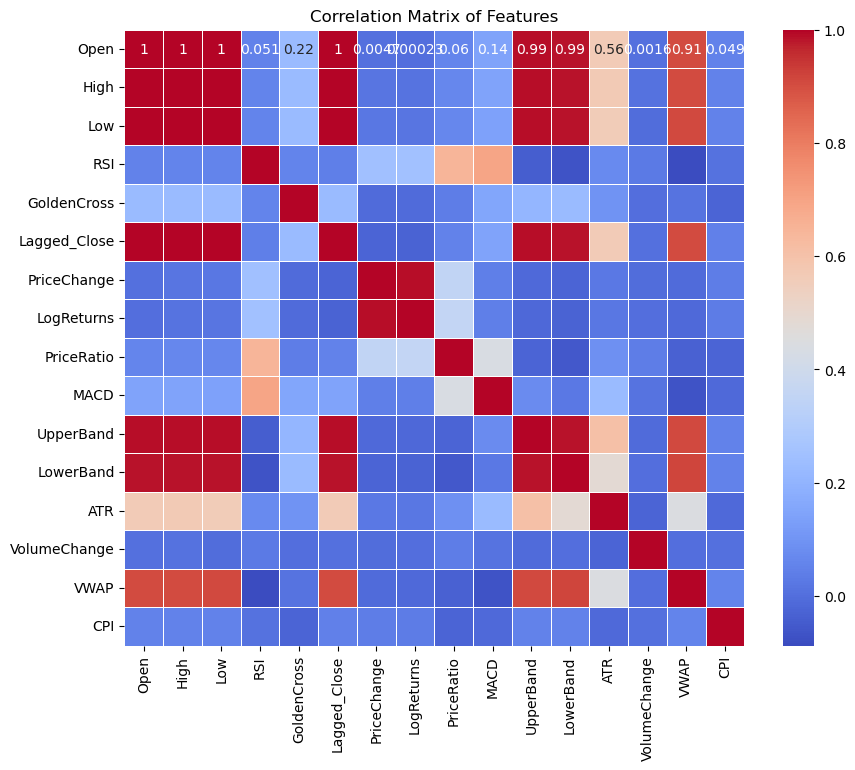

In [12]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fredapi import Fred

# Your FRED API Key
fred_api_key = '5dc6e077bceb77f1cfdde2f8702b2974'

# Initialize the FRED client
fred = Fred(api_key=fred_api_key)

# Fetch historical Gold (GLD) data in daily timeframe
gld_data = yf.download('GLD', start='2017-01-01', end='2023-12-31')
# Fetch CPI and 10-Year Treasury Yield data from FRED
cpi_data = fred.get_series('CPIAUCSL', start='2017-01-01', end='2023-12-31').resample('D').ffill().pct_change()
treasury_yield_data = fred.get_series('DGS10', start='2017-01-01', end='2023-12-31').resample('D').ffill()

# Align CPI and Treasury data with GLD data
gld_data['CPI'] = cpi_data
gld_data['10YrYield'] = treasury_yield_data

# Calculate RSI
delta = gld_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
gld_data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Averages for Golden Cross
gld_data['MA50'] = gld_data['Close'].rolling(window=50).mean()
gld_data['MA200'] = gld_data['Close'].rolling(window=200).mean()

# Create Golden Cross indicator (1 if MA50 > MA200, else 0)
gld_data['GoldenCross'] = np.where(gld_data['MA50'] > gld_data['MA200'], 1, 0)

# Fetch CPI and 10-Year Treasury Yield data from FRED
cpi_data = fred.get_series('CPIAUCSL', start='2017-01-01', end='2023-12-31').resample('D').ffill().pct_change()

# Align CPI and Treasury data with GLD data
gld_data['CPI'] = cpi_data
gld_data['10YrYield'] = treasury_yield_data

# Calculate additional features
gld_data['PriceChange'] = gld_data['Close'].diff(1)
gld_data['LogReturns'] = np.log(gld_data['Close'] / gld_data['Close'].shift(1))
gld_data['PriceRatio'] = gld_data['Close'] / gld_data['Close'].shift(7)  # 7-day ratio
gld_data['EMA12'] = gld_data['Close'].ewm(span=12, adjust=False).mean()
gld_data['EMA26'] = gld_data['Close'].ewm(span=26, adjust=False).mean()
gld_data['MACD'] = gld_data['EMA12'] - gld_data['EMA26']
gld_data['20SMA'] = gld_data['Close'].rolling(window=20).mean()
gld_data['StdDev'] = gld_data['Close'].rolling(window=20).std()
gld_data['UpperBand'] = gld_data['20SMA'] + (gld_data['StdDev'] * 2)
gld_data['LowerBand'] = gld_data['20SMA'] - (gld_data['StdDev'] * 2)
gld_data['ATR'] = gld_data['High'].rolling(window=14).max() - gld_data['Low'].rolling(window=14).min()
gld_data['VolumeChange'] = gld_data['Volume'].diff(1)
gld_data['VWAP'] = (gld_data['Volume'] * gld_data['Close']).cumsum() / gld_data['Volume'].cumsum()

# Calculate the lagged closing price (previous day's closing price)
gld_data['Lagged_Close'] = gld_data['Close'].shift(1)

# Calculate daily returns (percentage change in closing prices)
gld_data['Return'] = gld_data['Close'].pct_change()

# Prepare the data with all specified features and returns as the target variable
features = ['Open', 'High', 'Low', 'RSI', 'GoldenCross', 'Lagged_Close', 'PriceChange', 'LogReturns',
            'PriceRatio', 'MACD', 'UpperBand', 'LowerBand', 'ATR', 'VolumeChange', 'VWAP', 'CPI']

# Drop rows with NaN values in both features and target
data = gld_data[features + ['Return']].dropna()

# Split the features and target
X_daily = data[features]
y_daily = data['Return']

# Split the data into training and testing sets
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.2, random_state=42)

# Train the Linear Regression model on daily data
model_daily = LinearRegression()
model_daily.fit(X_train_daily, y_train_daily)

# Predict returns on the test set
y_pred_lr = model_daily.predict(X_test_daily)

# Evaluate the model
mse_daily = mean_squared_error(y_test_daily, y_pred_lr)
r2_daily = r2_score(y_test_daily, y_pred_lr)

print(f"Daily Mean Squared Error: {mse_daily}")
print(f"Daily R^2 Score: {r2_daily}")

# Annualize the predicted returns
trading_days = 252  # Number of trading days in a year
mean_daily_return_lr = np.mean(y_pred_lr)
annualized_predicted_return_lr = (1 + mean_daily_return_lr) ** trading_days - 1

print(f"Annualized Predicted Return using linear regression: {annualized_predicted_return_lr:.2%}")

# Sort data for plotting
y_test_daily_sorted = y_test_daily.sort_index()
y_pred_daily_sorted = pd.Series(y_pred_lr, index=y_test_daily.index).sort_index()

# Plot the actual and predicted returns
plt.figure(figsize=(10, 6))
plt.plot(y_test_daily_sorted.index, y_test_daily_sorted, label='Actual Returns', color='blue', marker='o')
plt.plot(y_pred_daily_sorted.index, y_pred_daily_sorted, label='Predicted Returns', color='red', linestyle='--', marker='x')

# Add a line of best fit for predicted returns
z_daily = np.polyfit(y_test_daily_sorted, y_pred_daily_sorted, 1)
p_daily = np.poly1d(z_daily)
plt.plot(y_test_daily_sorted.index, p_daily(y_test_daily_sorted), label='Best Fit Line', color='green', linestyle='-')

plt.title('GLD Daily Actual vs Predicted Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Create a correlation matrix
corr_matrix = X_daily.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


# RANDOM FOREST

In [16]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import numpy as np
from fredapi import Fred

# Your FRED API Key
fred_api_key = '5dc6e077bceb77f1cfdde2f8702b2974'

# Initialize the FRED client
fred = Fred(api_key=fred_api_key)

# Fetch historical TLT (20+ Year Treasury Bond ETF) data in daily timeframe
tlt_data = yf.download('TLT', start='2017-01-01', end='2023-12-31')

# Fetch CPI data from FRED
cpi_data = fred.get_series('CPIAUCSL', start='2017-01-01', end='2023-12-31')
cpi_data = cpi_data.resample('D').ffill().pct_change()

# Fetch 10-Year US Government Bond Interest Rate from FRED
bond_data = fred.get_series('DGS10', start='2017-01-01', end='2023-12-31')
bond_data = bond_data.resample('D').ffill()

# Merge all data into a single DataFrame
tlt_data['CPI'] = cpi_data
tlt_data['10YrBond'] = bond_data

# Calculate RSI
delta = tlt_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
tlt_data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Averages for Golden Cross
tlt_data['MA50'] = tlt_data['Close'].rolling(window=50).mean()
tlt_data['MA200'] = tlt_data['Close'].rolling(window=200).mean()

# Create Golden Cross indicator (1 if MA50 > MA200, else 0)
tlt_data['GoldenCross'] = np.where(tlt_data['MA50'] > tlt_data['MA200'], 1, 0)

# Calculate additional features
tlt_data['PriceChange'] = tlt_data['Close'].diff(1)
tlt_data['LogReturns'] = np.log(tlt_data['Close'] / tlt_data['Close'].shift(1))
tlt_data['PriceRatio'] = tlt_data['Close'] / tlt_data['Close'].shift(7)  # 7-day ratio
tlt_data['EMA12'] = tlt_data['Close'].ewm(span=12, adjust=False).mean()
tlt_data['EMA26'] = tlt_data['Close'].ewm(span=26, adjust=False).mean()
tlt_data['MACD'] = tlt_data['EMA12'] - tlt_data['EMA26']
tlt_data['20SMA'] = tlt_data['Close'].rolling(window=20).mean()
tlt_data['StdDev'] = tlt_data['Close'].rolling(window=20).std()
tlt_data['UpperBand'] = tlt_data['20SMA'] + (tlt_data['StdDev'] * 2)
tlt_data['LowerBand'] = tlt_data['20SMA'] - (tlt_data['StdDev'] * 2)
tlt_data['ATR'] = tlt_data['High'].rolling(window=14).max() - tlt_data['Low'].rolling(window=14).min()
tlt_data['VolumeChange'] = tlt_data['Volume'].diff(1)
tlt_data['VWAP'] = (tlt_data['Volume'] * tlt_data['Close']).cumsum() / tlt_data['Volume'].cumsum()

# Calculate the lagged closing price (previous day's closing price)
tlt_data['Lagged_Close'] = tlt_data['Close'].shift(1)

# Calculate daily returns (percentage change in closing prices)
tlt_data['Return'] = tlt_data['Close'].pct_change()

# Prepare the data with all specified features and returns as the target variable
features = ['Open', 'High', 'Low', 'RSI', 'GoldenCross', 'Lagged_Close', 'PriceChange', 'LogReturns',
            'PriceRatio', 'MACD', 'UpperBand', 'LowerBand', 'ATR', 'VolumeChange', 'VWAP', 'CPI', '10YrBond']

# Drop rows with NaN values in both features and target
data = tlt_data[features + ['Return']].dropna()

# Split the features and target
X_daily = data[features]
y_daily = data['Return']

# Split the data into training and testing sets
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_reg.fit(X_train_daily, y_train_daily)

# Predict returns on the test set
y_pred_rf_reg = rf_model_reg.predict(X_test_daily)

# Evaluate the regressor model
mse_rf = mean_squared_error(y_test_daily, y_pred_rf_reg)
r2_rf = r2_score(y_test_daily, y_pred_rf_reg)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R^2 Score: {r2_rf}")

# Convert the returns to binary classes for classification (1 if return > 0, else 0)
y_daily_class = (y_daily > 0).astype(int)

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_daily, y_daily_class, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_class.fit(X_train_class, y_train_class)

# Predict classes on the test set
y_pred_rf_class = rf_model_class.predict(X_test_class)

# Evaluate the classifier model
accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_rf_class))

# Annualize the predicted returns
trading_days = 252  # Number of trading days in a year
mean_daily_return_rf = np.mean(y_pred_rf_reg)
annualized_predicted_return_rf = (1 + mean_daily_return_rf) ** trading_days - 1

print(f"Annualized Predicted Return using Random Forest Regressor: {annualized_predicted_return_rf:.2%}")


[*********************100%%**********************]  1 of 1 completed


Random Forest Regressor Mean Squared Error: 4.9678911301629325e-08
Random Forest Regressor R^2 Score: 0.9994902928979056
Random Forest Classifier Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       185

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

Annualized Predicted Return using Random Forest Regressor: 19.04%


## RANDOM FOREST WITH PCA

[*********************100%%**********************]  1 of 1 completed


Explained Variance Ratio by each Principal Component:
[0.44247905 0.16524049 0.09778057 0.06375093 0.06025554 0.05798687
 0.04567329 0.03025902]

PCA Component Loadings:
         Open      High       Low       RSI  GoldenCross  Lagged_Close  \
PC1  0.363293  0.363598  0.363001  0.043818     0.213433      0.362882   
PC2 -0.011981 -0.006283 -0.005459  0.464291     0.060504     -0.027310   
PC3  0.002230 -0.006694 -0.006738  0.296503     0.138243      0.017973   
PC4 -0.031525 -0.021359 -0.046847  0.062101    -0.190688     -0.034424   
PC5 -0.009244 -0.004652 -0.015758  0.153104    -0.151847     -0.004891   
PC6  0.007756  0.004102  0.014644  0.040593    -0.056487      0.008228   
PC7 -0.054714 -0.045968 -0.061570 -0.267867     0.633951     -0.061454   
PC8  0.056445  0.059384  0.055052 -0.111284    -0.671373      0.051672   

     PriceChange  LogReturns  PriceRatio      MACD  UpperBand  LowerBand  \
PC1     0.009200    0.010185    0.039061  0.102604   0.359614   0.355425   
PC2     0.4

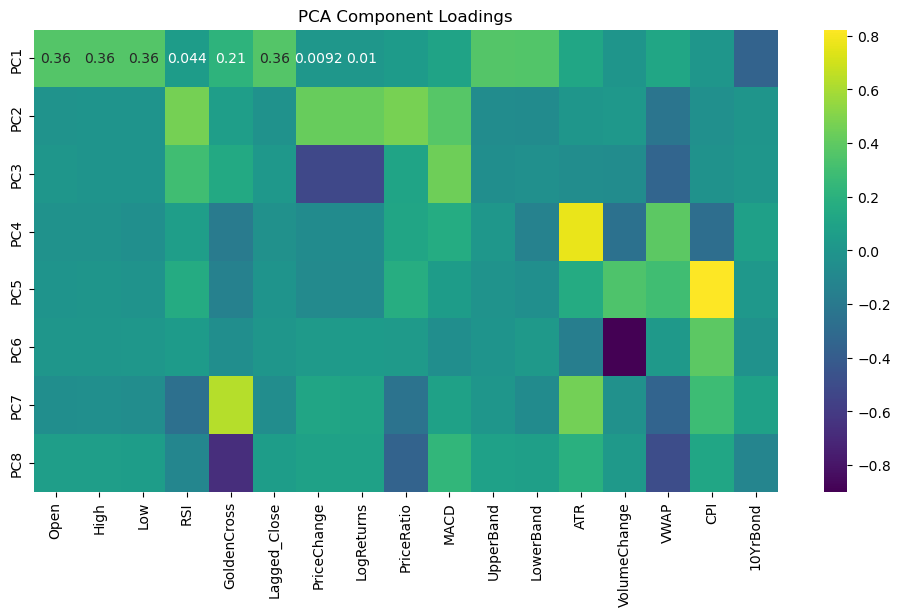

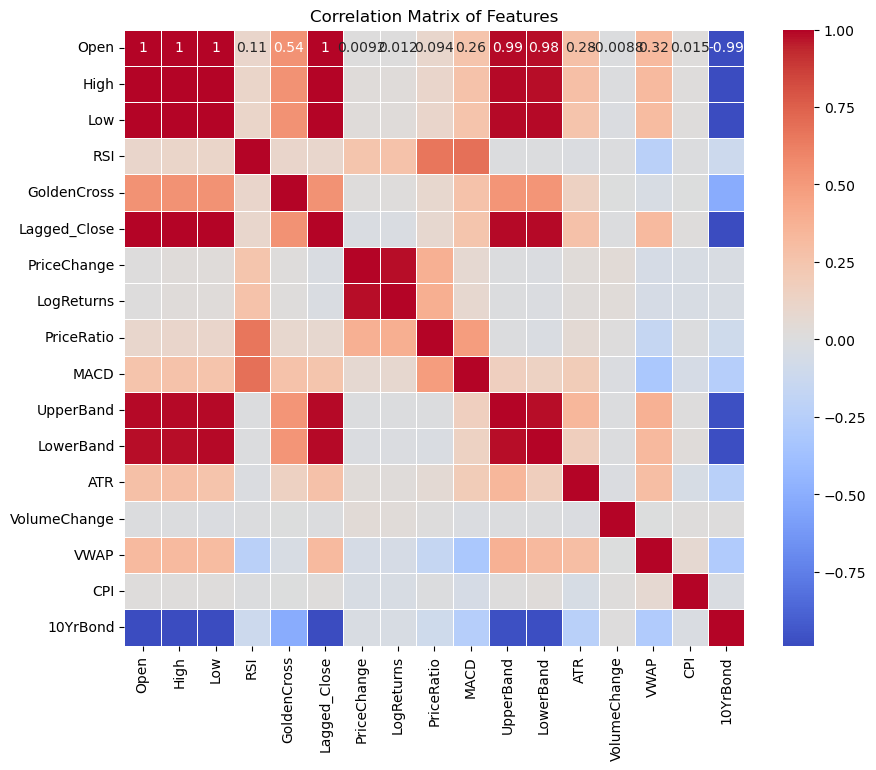

Random Forest Regressor Mean Squared Error: 2.9058179503880117e-06
Random Forest Regressor R^2 Score: 0.9701862217206503
Annualized Predicted Return using Random Forest Regressor: 13.68%
Random Forest Classifier Accuracy: 0.9624277456647399
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       161
           1       0.96      0.97      0.96       185

    accuracy                           0.96       346
   macro avg       0.96      0.96      0.96       346
weighted avg       0.96      0.96      0.96       346



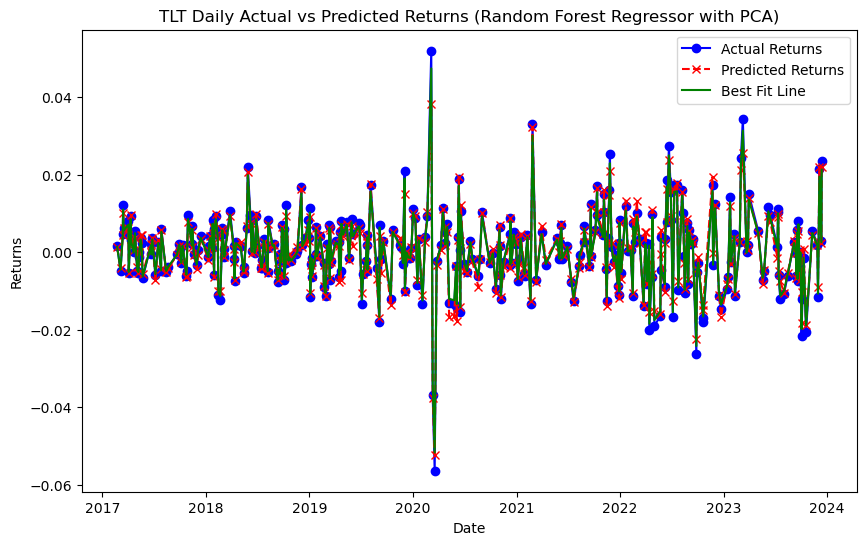

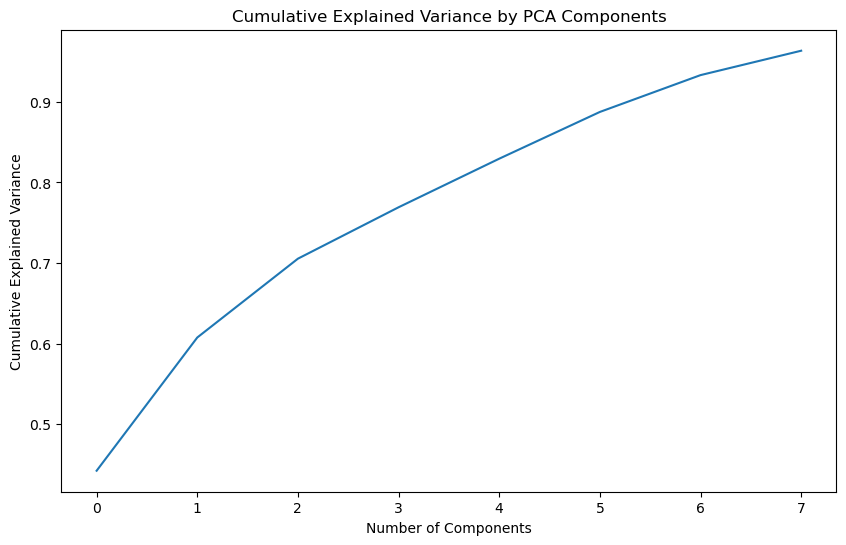

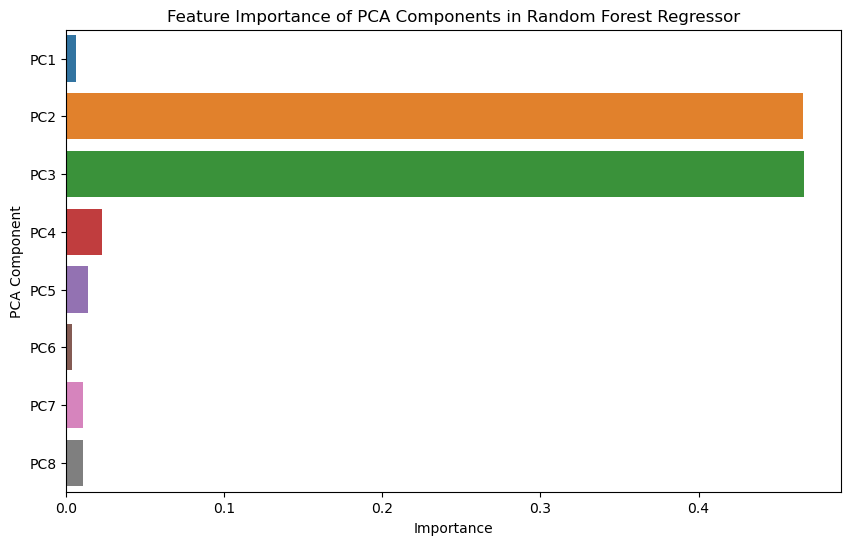

In [18]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fredapi import Fred

# Your FRED API Key
fred_api_key = '5dc6e077bceb77f1cfdde2f8702b2974'

# Initialize the FRED client
fred = Fred(api_key=fred_api_key)

# Fetch historical TLT (20+ Year Treasury Bond ETF) data in daily timeframe
tlt_data = yf.download('TLT', start='2017-01-01', end='2023-12-31')

# Fetch CPI data from FRED
cpi_data = fred.get_series('CPIAUCSL', start='2017-01-01', end='2023-12-31')
cpi_data = cpi_data.resample('D').ffill().pct_change()

# Fetch 10-Year US Government Bond Interest Rate from FRED
bond_data = fred.get_series('DGS10', start='2017-01-01', end='2023-12-31')
bond_data = bond_data.resample('D').ffill()

# Merge all data into a single DataFrame
tlt_data['CPI'] = cpi_data
tlt_data['10YrBond'] = bond_data

# Calculate RSI
delta = tlt_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
tlt_data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Averages for Golden Cross
tlt_data['MA50'] = tlt_data['Close'].rolling(window=50).mean()
tlt_data['MA200'] = tlt_data['Close'].rolling(window=200).mean()

# Create Golden Cross indicator (1 if MA50 > MA200, else 0)
tlt_data['GoldenCross'] = np.where(tlt_data['MA50'] > tlt_data['MA200'], 1, 0)

# Calculate additional features
tlt_data['PriceChange'] = tlt_data['Close'].diff(1)
tlt_data['LogReturns'] = np.log(tlt_data['Close'] / tlt_data['Close'].shift(1))
tlt_data['PriceRatio'] = tlt_data['Close'] / tlt_data['Close'].shift(7)  # 7-day ratio
tlt_data['EMA12'] = tlt_data['Close'].ewm(span=12, adjust=False).mean()
tlt_data['EMA26'] = tlt_data['Close'].ewm(span=26, adjust=False).mean()
tlt_data['MACD'] = tlt_data['EMA12'] - tlt_data['EMA26']
tlt_data['20SMA'] = tlt_data['Close'].rolling(window=20).mean()
tlt_data['StdDev'] = tlt_data['Close'].rolling(window=20).std()
tlt_data['UpperBand'] = tlt_data['20SMA'] + (tlt_data['StdDev'] * 2)
tlt_data['LowerBand'] = tlt_data['20SMA'] - (tlt_data['StdDev'] * 2)
tlt_data['ATR'] = tlt_data['High'].rolling(window=14).max() - tlt_data['Low'].rolling(window=14).min()
tlt_data['VolumeChange'] = tlt_data['Volume'].diff(1)
tlt_data['VWAP'] = (tlt_data['Volume'] * tlt_data['Close']).cumsum() / tlt_data['Volume'].cumsum()

# Calculate the lagged closing price (previous day's closing price)
tlt_data['Lagged_Close'] = tlt_data['Close'].shift(1)

# Calculate daily returns (percentage change in closing prices)
tlt_data['Return'] = tlt_data['Close'].pct_change()

# Prepare the data with all specified features and returns as the target variable
features = ['Open', 'High', 'Low', 'RSI', 'GoldenCross', 'Lagged_Close', 'PriceChange', 'LogReturns',
            'PriceRatio', 'MACD', 'UpperBand', 'LowerBand', 'ATR', 'VolumeChange', 'VWAP', 'CPI', '10YrBond']

# Drop rows with NaN values in both features and target
data = tlt_data[features + ['Return']].dropna()

# Split the features and target
X_daily = data[features]
y_daily = data['Return']

# Standardize the data
scaler = StandardScaler()
X_daily_scaled = scaler.fit_transform(X_daily)

# Apply PCA to retain more components (e.g., capturing 95% of the variance)
pca = PCA(n_components=0.95)  # This retains components that explain 95% of the variance
X_daily_pca = pca.fit_transform(X_daily_scaled)

# Display the explained variance ratio of each component
print("Explained Variance Ratio by each Principal Component:")
print(pca.explained_variance_ratio_)

# Inspect PCA components (optional)
# Create a DataFrame to see the contribution of each feature to the principal components
pca_components_df = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nPCA Component Loadings:")
print(pca_components_df)

# Plot heatmap of the PCA components
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components_df, cmap='viridis', annot=True)
plt.title('PCA Component Loadings')
plt.show()

# Correlation Matrix
corr_matrix = pd.DataFrame(X_daily_scaled, columns=features).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Split the data into training and testing sets
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily_pca, y_daily, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_reg.fit(X_train_daily, y_train_daily)

# Predict returns on the test set
y_pred_rf_reg = rf_model_reg.predict(X_test_daily)

# Evaluate the regressor model
mse_rf = mean_squared_error(y_test_daily, y_pred_rf_reg)
r2_rf = r2_score(y_test_daily, y_pred_rf_reg)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R^2 Score: {r2_rf}")

# Annualize the predicted returns
trading_days = 252  # Number of trading days in a year
mean_daily_return_rf = np.mean(y_pred_rf_reg)
annualized_predicted_return_rf = (1 + mean_daily_return_rf) ** trading_days - 1

print(f"Annualized Predicted Return using Random Forest Regressor: {annualized_predicted_return_rf:.2%}")

# Convert the returns to binary classes for classification (1 if return > 0, else 0)
y_daily_class = (y_daily > 0).astype(int)

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_daily_pca, y_daily_class, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_class.fit(X_train_class, y_train_class)

# Predict classes on the test set
y_pred_rf_class = rf_model_class.predict(X_test_class)

# Evaluate the classifier model
accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_rf_class))

# Plotting the actual vs predicted returns for the regressor
plt.figure(figsize=(10, 6))
y_test_daily_sorted = y_test_daily.sort_index()
y_pred_rf_reg_sorted = pd.Series(y_pred_rf_reg, index=y_test_daily.index).sort_index()
plt.plot(y_test_daily_sorted.index, y_test_daily_sorted, label='Actual Returns', color='blue', marker='o')
plt.plot(y_pred_rf_reg_sorted.index, y_pred_rf_reg_sorted, label='Predicted Returns', color='red', linestyle='--', marker='x')

# Add a line of best fit for predicted returns
z_rf = np.polyfit(y_test_daily_sorted, y_pred_rf_reg_sorted, 1)
p_rf = np.poly1d(z_rf)
plt.plot(y_test_daily_sorted.index, p_rf(y_test_daily_sorted), label='Best Fit Line', color='green', linestyle='-')

plt.title('TLT Daily Actual vs Predicted Returns (Random Forest Regressor with PCA)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Display the explained variance by each PCA component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()

# Feature importance for PCA components
pca_feature_importances = pd.DataFrame({
    'PCA Component': [f'PC{i+1}' for i in range(pca.n_components_)],
    'Importance': rf_model_reg.feature_importances_
})

# Visualize feature importance of PCA components
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='PCA Component', data=pca_feature_importances)
plt.title('Feature Importance of PCA Components in Random Forest Regressor')
plt.show()


# Recursive Feature Elimination (RFE) and Lasso Regression (L1 Regularization)

[*********************100%%**********************]  1 of 1 completed


Selected Features by Lasso: Index(['LogReturns'], dtype='object')
R^2 Score using Lasso: 0.9996405265159585


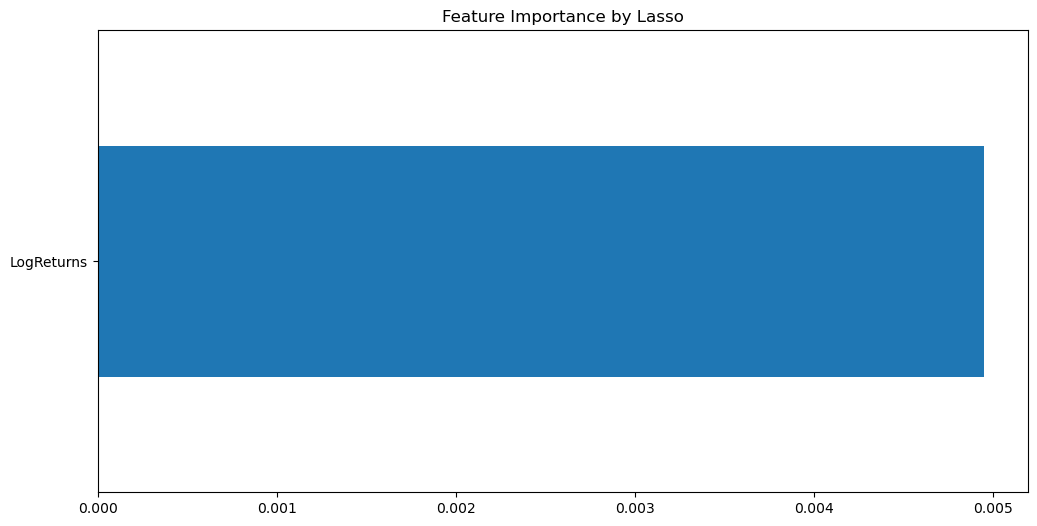

In [34]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from fredapi import Fred

# Your FRED API Key
fred_api_key = '5dc6e077bceb77f1cfdde2f8702b2974'

# Initialize the FRED client
fred = Fred(api_key=fred_api_key)

# Fetch historical TLT (20+ Year Treasury Bond ETF) data in daily timeframe
tlt_data = yf.download('TLT', start='2017-01-01', end='2023-12-31')

# Fetch CPI data from FRED
cpi_data = fred.get_series('CPIAUCSL', start='2017-01-01', end='2023-12-31')
cpi_data = cpi_data.resample('D').ffill().pct_change()

# Fetch 10-Year US Government Bond Interest Rate from FRED
bond_data = fred.get_series('DGS10', start='2017-01-01', end='2023-12-31')
bond_data = bond_data.resample('D').ffill()

# Merge all data into a single DataFrame
tlt_data['CPI'] = cpi_data
tlt_data['10YrBond'] = bond_data

# Calculate RSI
delta = tlt_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
tlt_data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Averages for Golden Cross
tlt_data['MA50'] = tlt_data['Close'].rolling(window=50).mean()
tlt_data['MA200'] = tlt_data['Close'].rolling(window=200).mean()

# Create Golden Cross indicator (1 if MA50 > MA200, else 0)
tlt_data['GoldenCross'] = np.where(tlt_data['MA50'] > tlt_data['MA200'], 1, 0)

# Calculate additional features
tlt_data['PriceChange'] = tlt_data['Close'].diff(1)
tlt_data['LogReturns'] = np.log(tlt_data['Close'] / tlt_data['Close'].shift(1))
tlt_data['PriceRatio'] = tlt_data['Close'] / tlt_data['Close'].shift(7)  # 7-day ratio
tlt_data['EMA12'] = tlt_data['Close'].ewm(span=12, adjust=False).mean()
tlt_data['EMA26'] = tlt_data['Close'].ewm(span=26, adjust=False).mean()
tlt_data['MACD'] = tlt_data['EMA12'] - tlt_data['EMA26']
tlt_data['20SMA'] = tlt_data['Close'].rolling(window=20).mean()
tlt_data['StdDev'] = tlt_data['Close'].rolling(window=20).std()
tlt_data['UpperBand'] = tlt_data['20SMA'] + (tlt_data['StdDev'] * 2)
tlt_data['LowerBand'] = tlt_data['20SMA'] - (tlt_data['StdDev'] * 2)
tlt_data['ATR'] = tlt_data['High'].rolling(window=14).max() - tlt_data['Low'].rolling(window=14).min()
tlt_data['VolumeChange'] = tlt_data['Volume'].diff(1)
tlt_data['VWAP'] = (tlt_data['Volume'] * tlt_data['Close']).cumsum() / tlt_data['Volume'].cumsum()

# Calculate the lagged closing price (previous day's closing price)
tlt_data['Lagged_Close'] = tlt_data['Close'].shift(1)

# Calculate daily returns (percentage change in closing prices)
tlt_data['Return'] = tlt_data['Close'].pct_change()

# Prepare the data with all specified features and returns as the target variable
features = ['Open', 'High', 'Low', 'RSI', 'GoldenCross', 'Lagged_Close', 'PriceChange', 'LogReturns',
            'PriceRatio', 'MACD', 'UpperBand', 'LowerBand', 'ATR', 'VolumeChange', 'VWAP', 'CPI', '10YrBond']

# Drop rows with NaN values in both features and target
data = tlt_data[features + ['Return']].dropna()

# Split the features and target
X_daily = data[features]
y_daily = data['Return']

# Standardize the data
scaler = StandardScaler()
X_daily_scaled = scaler.fit_transform(X_daily)

### Lasso Regression (L1 Regularization) for Feature Selection ###
lasso = Lasso(alpha=0.005)  # Regularization strength
lasso.fit(X_daily_scaled, y_daily)

# Get coefficients of features
lasso_coefficients = pd.Series(lasso.coef_, index=X_daily.columns)
selected_features_lasso = lasso_coefficients[lasso_coefficients != 0].index

# Debugging: Check if any features were selected
if selected_features_lasso.empty:
    print("No features were selected by Lasso. Consider adjusting the alpha parameter.")
else:
    print("Selected Features by Lasso:", selected_features_lasso)

    # Train the model using the selected features from Lasso
    X_selected_lasso = X_daily[selected_features_lasso]
    X_selected_lasso_scaled = scaler.fit_transform(X_selected_lasso)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_selected_lasso_scaled, y_daily)

    # Evaluate Lasso model
    y_pred_rf_lasso = rf_model.predict(X_selected_lasso_scaled)
    r2_rf_lasso = r2_score(y_daily, y_pred_rf_lasso)
    print(f"R^2 Score using Lasso: {r2_rf_lasso}")

    ### Visualizing the Importance of Features Selected by Lasso ###
    plt.figure(figsize=(12, 6))
    lasso_coefficients[lasso_coefficients != 0].sort_values().plot(kind='barh')
    plt.title('Feature Importance by Lasso')
    plt.show()


# MODELS AFTER FEATURE REDUCTION
removed logreturns

In [52]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from fredapi import Fred

# Your FRED API Key
fred_api_key = '5dc6e077bceb77f1cfdde2f8702b2974'

# Initialize the FRED client
fred = Fred(api_key=fred_api_key)

# Fetch historical TLT (20+ Year Treasury Bond ETF) data in daily timeframe
tlt_data = yf.download('TLT', start='2017-01-01', end='2023-12-31')

# Fetch CPI data from FRED
cpi_data = fred.get_series('CPIAUCSL', start='2017-01-01', end='2023-12-31')
cpi_data = cpi_data.resample('D').ffill().pct_change()

# Fetch 10-Year US Government Bond Interest Rate from FRED
bond_data = fred.get_series('DGS10', start='2017-01-01', end='2023-12-31')
bond_data = bond_data.resample('D').ffill()

# Merge all data into a single DataFrame
tlt_data['CPI'] = cpi_data
tlt_data['10YrBond'] = bond_data

# Calculate RSI
delta = tlt_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
tlt_data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Averages for Golden Cross
tlt_data['MA50'] = tlt_data['Close'].rolling(window=50).mean()
tlt_data['MA200'] = tlt_data['Close'].rolling(window=200).mean()

# Create Golden Cross indicator (1 if MA50 > MA200, else 0)
tlt_data['GoldenCross'] = np.where(tlt_data['MA50'] > tlt_data['MA200'], 1, 0)

# Calculate additional features
tlt_data['PriceChange'] = tlt_data['Close'].diff(1)
tlt_data['LogReturns'] = np.log(tlt_data['Close'] / tlt_data['Close'].shift(1))
tlt_data['PriceRatio'] = tlt_data['Close'] / tlt_data['Close'].shift(7)  # 7-day ratio
tlt_data['EMA12'] = tlt_data['Close'].ewm(span=12, adjust=False).mean()
tlt_data['EMA26'] = tlt_data['Close'].ewm(span=26, adjust=False).mean()
tlt_data['MACD'] = tlt_data['EMA12'] - tlt_data['EMA26']
tlt_data['20SMA'] = tlt_data['Close'].rolling(window=20).mean()
tlt_data['StdDev'] = tlt_data['Close'].rolling(window=20).std()
tlt_data['UpperBand'] = tlt_data['20SMA'] + (tlt_data['StdDev'] * 2)
tlt_data['LowerBand'] = tlt_data['20SMA'] - (tlt_data['StdDev'] * 2)
tlt_data['ATR'] = tlt_data['High'].rolling(window=14).max() - tlt_data['Low'].rolling(window=14).min()
tlt_data['VolumeChange'] = tlt_data['Volume'].diff(1)
tlt_data['VWAP'] = (tlt_data['Volume'] * tlt_data['Close']).cumsum() / tlt_data['Volume'].cumsum()

# Calculate the lagged closing price (previous day's closing price)
tlt_data['Lagged_Close'] = tlt_data['Close'].shift(1)

# Calculate daily returns (percentage change in closing prices)
tlt_data['Return'] = tlt_data['Close'].pct_change()

# Prepare the data with all specified features and returns as the target variable
features = ['Open', 'High', 'RSI', 'GoldenCross', 'Lagged_Close', 'PriceChange',
            'PriceRatio', 'MACD', 'UpperBand', 'ATR', 'VolumeChange', 'CPI']

# Drop rows with NaN values in both features and target
data = tlt_data[features + ['Return']].dropna()

# Split the features and target
X_daily = data[features]
y_daily = data['Return']

# Standardize the data
scaler = StandardScaler()
X_daily_scaled = scaler.fit_transform(X_daily)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_daily_scaled, y_daily, test_size=0.2, random_state=42)

# Train and evaluate a Linear Regression model (without PCA)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate and print evaluation metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression Mean Absolute Error: {mae_lr}")
print(f"Linear Regression R^2 Score: {r2_lr}")

# Calculate the number of trading days in a year
trading_days = 252

# Calculate the mean of daily returns predicted by the Linear Regression model
mean_daily_return_lr = y_pred_lr.mean()

# Annualize the return
annualized_return_lr = mean_daily_return_lr * trading_days
print(f"Annualized Expected Return using Linear Regression: {annualized_return_lr}")

# Apply PCA only to the Random Forest model
pca = PCA(n_components=0.95)  # Retain components that explain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate the Random Forest Regressor model with PCA-transformed features
best_rf = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf.fit(X_train_pca, y_train)
y_pred_rf_reg = best_rf.predict(X_test_pca)

# Calculate and print evaluation metrics for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf_reg)
mae_rf = mean_absolute_error(y_test, y_pred_rf_reg)
r2_rf = r2_score(y_test, y_pred_rf_reg)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor Mean Absolute Error: {mae_rf}")
print(f"Random Forest Regressor R^2 Score: {r2_rf}")

# Calculate the mean of daily returns predicted by the Random Forest model
mean_daily_return_rf = y_pred_rf_reg.mean()

# Annualize the return
annualized_return_rf = mean_daily_return_rf * trading_days
print(f"Annualized Expected Return using Random Forest Regressor: {annualized_return_rf}")


[*********************100%%**********************]  1 of 1 completed


Linear Regression Mean Squared Error: 4.729729224271469e-06
Linear Regression Mean Absolute Error: 0.0012263561633408804
Linear Regression R^2 Score: 0.9603930995276269
Annualized Expected Return using Linear Regression: -0.08927907821529629
Random Forest Regressor Mean Squared Error: 1.6480046753203676e-05
Random Forest Regressor Mean Absolute Error: 0.002143191928235383
Random Forest Regressor R^2 Score: 0.8619955729844695
Annualized Expected Return using Random Forest Regressor: -0.06910117074899498


## CROSS VALIDATION

In [54]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from fredapi import Fred

# Your FRED API Key
fred_api_key = '5dc6e077bceb77f1cfdde2f8702b2974'

# Initialize the FRED client
fred = Fred(api_key=fred_api_key)

# Fetch historical TLT (20+ Year Treasury Bond ETF) data in daily timeframe
tlt_data = yf.download('TLT', start='2017-01-01', end='2023-12-31')

# Fetch CPI data from FRED
cpi_data = fred.get_series('CPIAUCSL', start='2017-01-01', end='2023-12-31')
cpi_data = cpi_data.resample('D').ffill().pct_change()

# Fetch 10-Year US Government Bond Interest Rate from FRED
bond_data = fred.get_series('DGS10', start='2017-01-01', end='2023-12-31')
bond_data = bond_data.resample('D').ffill()

# Merge all data into a single DataFrame
tlt_data['CPI'] = cpi_data
tlt_data['10YrBond'] = bond_data

# Calculate RSI
delta = tlt_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
tlt_data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Averages for Golden Cross
tlt_data['MA50'] = tlt_data['Close'].rolling(window=50).mean()
tlt_data['MA200'] = tlt_data['Close'].rolling(window=200).mean()

# Create Golden Cross indicator (1 if MA50 > MA200, else 0)
tlt_data['GoldenCross'] = np.where(tlt_data['MA50'] > tlt_data['MA200'], 1, 0)

# Calculate additional features
tlt_data['PriceChange'] = tlt_data['Close'].diff(1)
tlt_data['LogReturns'] = np.log(tlt_data['Close'] / tlt_data['Close'].shift(1))
tlt_data['PriceRatio'] = tlt_data['Close'] / tlt_data['Close'].shift(7)  # 7-day ratio
tlt_data['EMA12'] = tlt_data['Close'].ewm(span=12, adjust=False).mean()
tlt_data['EMA26'] = tlt_data['Close'].ewm(span=26, adjust=False).mean()
tlt_data['MACD'] = tlt_data['EMA12'] - tlt_data['EMA26']
tlt_data['20SMA'] = tlt_data['Close'].rolling(window=20).mean()
tlt_data['StdDev'] = tlt_data['Close'].rolling(window=20).std()
tlt_data['UpperBand'] = tlt_data['20SMA'] + (tlt_data['StdDev'] * 2)
tlt_data['LowerBand'] = tlt_data['20SMA'] - (tlt_data['StdDev'] * 2)
tlt_data['ATR'] = tlt_data['High'].rolling(window=14).max() - tlt_data['Low'].rolling(window=14).min()
tlt_data['VolumeChange'] = tlt_data['Volume'].diff(1)
tlt_data['VWAP'] = (tlt_data['Volume'] * tlt_data['Close']).cumsum() / tlt_data['Volume'].cumsum()

# Calculate the lagged closing price (previous day's closing price)
tlt_data['Lagged_Close'] = tlt_data['Close'].shift(1)

# Calculate daily returns (percentage change in closing prices)
tlt_data['Return'] = tlt_data['Close'].pct_change()

# Prepare the data with all specified features and returns as the target variable
features = ['Open', 'High', 'RSI', 'GoldenCross', 'Lagged_Close', 'PriceChange',
            'PriceRatio', 'MACD', 'UpperBand', 'ATR', 'VolumeChange', 'CPI']

# Drop rows with NaN values in both features and target
data = tlt_data[features + ['Return']].dropna()

# Split the features and target
X_daily = data[features]
y_daily = data['Return']

# Standardize the data
scaler = StandardScaler()
X_daily_scaled = scaler.fit_transform(X_daily)

# Apply PCA to the data
pca = PCA(n_components=0.95)  # Retain components that explain 95% of variance
X_daily_pca = pca.fit_transform(X_daily_scaled)

# Use TimeSeriesSplit for cross-validation (better suited for time-series data)
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation for Linear Regression
lr_model = LinearRegression()
lr_cv_scores = cross_val_score(lr_model, X_daily_pca, y_daily, cv=tscv, scoring='r2')

# Perform cross-validation for Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_daily_pca, y_daily, cv=tscv, scoring='r2')

# Print the cross-validation scores for Linear Regression
print(f"Linear Regression Cross-validated R^2 scores: {lr_cv_scores}")
print(f"Mean R^2 (Linear Regression): {lr_cv_scores.mean()}")
print(f"Standard Deviation of R^2 (Linear Regression): {lr_cv_scores.std()}")

# Print the cross-validation scores for Random Forest Regressor
print(f"Random Forest Regressor Cross-validated R^2 scores: {rf_cv_scores}")
print(f"Mean R^2 (Random Forest Regressor): {rf_cv_scores.mean()}")
print(f"Standard Deviation of R^2 (Random Forest Regressor): {rf_cv_scores.std()}")


[*********************100%%**********************]  1 of 1 completed


Linear Regression Cross-validated R^2 scores: [0.9958339  0.92571083 0.99327089 0.95847389 0.90168117]
Mean R^2 (Linear Regression): 0.9549941354072958
Standard Deviation of R^2 (Linear Regression): 0.036999701353510384
Random Forest Regressor Cross-validated R^2 scores: [0.79312293 0.55805277 0.81543884 0.86788145 0.78834116]
Mean R^2 (Random Forest Regressor): 0.764567431186097
Standard Deviation of R^2 (Random Forest Regressor): 0.10704260618050788


# GridSearchCV
Further optimze the RF to make it more effective

In [56]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from fredapi import Fred

# Your FRED API Key
fred_api_key = '5dc6e077bceb77f1cfdde2f8702b2974'

# Initialize the FRED client
fred = Fred(api_key=fred_api_key)

# Fetch historical TLT (20+ Year Treasury Bond ETF) data in daily timeframe
tlt_data = yf.download('TLT', start='2017-01-01', end='2023-12-31')

# Fetch CPI data from FRED
cpi_data = fred.get_series('CPIAUCSL', start='2017-01-01', end='2023-12-31')
cpi_data = cpi_data.resample('D').ffill().pct_change()

# Fetch 10-Year US Government Bond Interest Rate from FRED
bond_data = fred.get_series('DGS10', start='2017-01-01', end='2023-12-31')
bond_data = bond_data.resample('D').ffill()

# Merge all data into a single DataFrame
tlt_data['CPI'] = cpi_data
tlt_data['10YrBond'] = bond_data

# Calculate RSI
delta = tlt_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
tlt_data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Averages for Golden Cross
tlt_data['MA50'] = tlt_data['Close'].rolling(window=50).mean()
tlt_data['MA200'] = tlt_data['Close'].rolling(window=200).mean()

# Create Golden Cross indicator (1 if MA50 > MA200, else 0)
tlt_data['GoldenCross'] = np.where(tlt_data['MA50'] > tlt_data['MA200'], 1, 0)

# Calculate additional features
tlt_data['PriceChange'] = tlt_data['Close'].diff(1)
tlt_data['LogReturns'] = np.log(tlt_data['Close'] / tlt_data['Close'].shift(1))
tlt_data['PriceRatio'] = tlt_data['Close'] / tlt_data['Close'].shift(7)  # 7-day ratio
tlt_data['EMA12'] = tlt_data['Close'].ewm(span=12, adjust=False).mean()
tlt_data['EMA26'] = tlt_data['Close'].ewm(span=26, adjust=False).mean()
tlt_data['MACD'] = tlt_data['EMA12'] - tlt_data['EMA26']
tlt_data['20SMA'] = tlt_data['Close'].rolling(window=20).mean()
tlt_data['StdDev'] = tlt_data['Close'].rolling(window=20).std()
tlt_data['UpperBand'] = tlt_data['20SMA'] + (tlt_data['StdDev'] * 2)
tlt_data['LowerBand'] = tlt_data['20SMA'] - (tlt_data['StdDev'] * 2)
tlt_data['ATR'] = tlt_data['High'].rolling(window=14).max() - tlt_data['Low'].rolling(window=14).min()
tlt_data['VolumeChange'] = tlt_data['Volume'].diff(1)
tlt_data['VWAP'] = (tlt_data['Volume'] * tlt_data['Close']).cumsum() / tlt_data['Volume'].cumsum()

# Calculate the lagged closing price (previous day's closing price)
tlt_data['Lagged_Close'] = tlt_data['Close'].shift(1)

# Calculate daily returns (percentage change in closing prices)
tlt_data['Return'] = tlt_data['Close'].pct_change()

# Prepare the data with all specified features and returns as the target variable
features = ['Open', 'High', 'RSI', 'GoldenCross', 'Lagged_Close', 'PriceChange',
            'PriceRatio', 'MACD', 'UpperBand', 'ATR', 'VolumeChange', 'CPI']

# Drop rows with NaN values in both features and target
data = tlt_data[features + ['Return']].dropna()

# Split the features and target
X_daily = data[features]
y_daily = data['Return']

# Standardize the data
scaler = StandardScaler()
X_daily_scaled = scaler.fit_transform(X_daily)

# Apply PCA to retain more components (e.g., capturing 95% of the variance)
pca = PCA(n_components=0.95)
X_daily_pca = pca.fit_transform(X_daily_scaled)

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Scorer for GridSearchCV
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring=mse_scorer, cv=5, n_jobs=-1, verbose=2)

# Fit the model with GridSearchCV
grid_search.fit(X_daily_pca, y_daily)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {-grid_search.best_score_}")

# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
X_train, X_test, y_train, y_test = train_test_split(X_daily_pca, y_daily, test_size=0.2, random_state=42)
y_pred_rf = best_rf.predict(X_test)

# Calculate and print evaluation metrics for the best Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Best Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Best Random Forest Regressor R^2 Score: {r2_rf}")


[*********************100%%**********************]  1 of 1 completed


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Negative MSE): 1.6095047399237127e-05
Best Random Forest Regressor Mean Squared Error: 1.6776707489827003e-06
Best Random Forest Regressor R^2 Score: 0.9859511326696287


# ENSEMBLE THE MODELS
combining LR and RF models together to increase predictability

In [58]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from fredapi import Fred

# Your FRED API Key
fred_api_key = '5dc6e077bceb77f1cfdde2f8702b2974'

# Initialize the FRED client
fred = Fred(api_key=fred_api_key)

# Fetch historical TLT (20+ Year Treasury Bond ETF) data in daily timeframe
tlt_data = yf.download('TLT', start='2017-01-01', end='2023-12-31')

# Fetch CPI data from FRED
cpi_data = fred.get_series('CPIAUCSL', start='2017-01-01', end='2023-12-31')
cpi_data = cpi_data.resample('D').ffill().pct_change()

# Fetch 10-Year US Government Bond Interest Rate from FRED
bond_data = fred.get_series('DGS10', start='2017-01-01', end='2023-12-31')
bond_data = bond_data.resample('D').ffill()

# Merge all data into a single DataFrame
tlt_data['CPI'] = cpi_data
tlt_data['10YrBond'] = bond_data

# Calculate RSI
delta = tlt_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
tlt_data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Averages for Golden Cross
tlt_data['MA50'] = tlt_data['Close'].rolling(window=50).mean()
tlt_data['MA200'] = tlt_data['Close'].rolling(window=200).mean()

# Create Golden Cross indicator (1 if MA50 > MA200, else 0)
tlt_data['GoldenCross'] = np.where(tlt_data['MA50'] > tlt_data['MA200'], 1, 0)

# Calculate additional features
tlt_data['PriceChange'] = tlt_data['Close'].diff(1)
tlt_data['LogReturns'] = np.log(tlt_data['Close'] / tlt_data['Close'].shift(1))
tlt_data['PriceRatio'] = tlt_data['Close'] / tlt_data['Close'].shift(7)  # 7-day ratio
tlt_data['EMA12'] = tlt_data['Close'].ewm(span=12, adjust=False).mean()
tlt_data['EMA26'] = tlt_data['Close'].ewm(span=26, adjust=False).mean()
tlt_data['MACD'] = tlt_data['EMA12'] - tlt_data['EMA26']
tlt_data['20SMA'] = tlt_data['Close'].rolling(window=20).mean()
tlt_data['StdDev'] = tlt_data['Close'].rolling(window=20).std()
tlt_data['UpperBand'] = tlt_data['20SMA'] + (tlt_data['StdDev'] * 2)
tlt_data['LowerBand'] = tlt_data['20SMA'] - (tlt_data['StdDev'] * 2)
tlt_data['ATR'] = tlt_data['High'].rolling(window=14).max() - tlt_data['Low'].rolling(window=14).min()
tlt_data['VolumeChange'] = tlt_data['Volume'].diff(1)
tlt_data['VWAP'] = (tlt_data['Volume'] * tlt_data['Close']).cumsum() / tlt_data['Volume'].cumsum()

# Calculate the lagged closing price (previous day's closing price)
tlt_data['Lagged_Close'] = tlt_data['Close'].shift(1)

# Calculate daily returns (percentage change in closing prices)
tlt_data['Return'] = tlt_data['Close'].pct_change()

# Prepare the data with all specified features and returns as the target variable
features = ['Open', 'High', 'Low', 'RSI', 'LogReturns',
            'PriceRatio', 'MACD', 'VolumeChange', 'VWAP', 'CPI', '10YrBond']

# Drop rows with NaN values in both features and target
data = tlt_data[features + ['Return']].dropna()

# Split the features and target
X_daily = data[features]
y_daily = data['Return']

# Standardize the data
scaler = StandardScaler()
X_daily_scaled = scaler.fit_transform(X_daily)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_daily_scaled, y_daily, test_size=0.2, random_state=42)

# Train and evaluate a Linear Regression model (without PCA)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate and print evaluation metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression Mean Absolute Error: {mae_lr}")
print(f"Linear Regression R^2 Score: {r2_lr}")

# Calculate the number of trading days in a year
trading_days = 252

# Calculate the mean of daily returns predicted by the Linear Regression model
mean_daily_return_lr = y_pred_lr.mean()

# Annualize the return
annualized_return_lr = mean_daily_return_lr * trading_days
print(f"Annualized Expected Return using Linear Regression: {annualized_return_lr}")

# Apply PCA only to the Random Forest model
pca = PCA(n_components=0.95)  # Retain components that explain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate the Random Forest Regressor model with PCA-transformed features
best_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)
best_rf.fit(X_train_pca, y_train)
y_pred_rf_reg = best_rf.predict(X_test_pca)

# Calculate and print evaluation metrics for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf_reg)
mae_rf = mean_absolute_error(y_test, y_pred_rf_reg)
r2_rf = r2_score(y_test, y_pred_rf_reg)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor Mean Absolute Error: {mae_rf}")
print(f"Random Forest Regressor R^2 Score: {r2_rf}")

# Calculate the mean of daily returns predicted by the Random Forest model
mean_daily_return_rf = y_pred_rf_reg.mean()

# Annualize the return
annualized_return_rf = mean_daily_return_rf * trading_days
print(f"Annualized Expected Return using Random Forest Regressor: {annualized_return_rf}")

# Ensemble: Weighted Average of Linear Regression and Random Forest Regressor
# Assign more weight to the Random Forest model as it performs better
weight_lr = 0.5271 
weight_rf = 0.4729 

# Combined predictions
y_pred_ensemble = (weight_rf * y_pred_rf_reg) + (weight_lr * y_pred_lr)

# Calculate and print evaluation metrics for the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Mean Squared Error: {mse_ensemble}")
print(f"Ensemble Model Mean Absolute Error: {mae_ensemble}")
print(f"Ensemble Model R^2 Score: {r2_ensemble}")

# Calculate the mean of daily returns predicted by the Ensemble model
mean_daily_return_ensemble = y_pred_ensemble.mean()

# Annualize the return
annualized_return_ensemble = mean_daily_return_ensemble * trading_days
print(f"Annualized Expected Return using Ensemble Model: {annualized_return_ensemble}")


[*********************100%%**********************]  1 of 1 completed


Linear Regression Mean Squared Error: 7.468502581064323e-09
Linear Regression Mean Absolute Error: 4.87759089431541e-05
Linear Regression R^2 Score: 0.9999283099518176
Annualized Expected Return using Linear Regression: 0.05782121023562007
Random Forest Regressor Mean Squared Error: 7.434740033754744e-06
Random Forest Regressor Mean Absolute Error: 0.0014389217966504018
Random Forest Regressor R^2 Score: 0.9286340380205382
Annualized Expected Return using Random Forest Regressor: 0.0058067930738464404
Ensemble Model Mean Squared Error: 1.6510365198965661e-06
Ensemble Model Mean Absolute Error: 0.0006780205742284436
Ensemble Model R^2 Score: 0.9841517243413103
Annualized Expected Return using Ensemble Model: 0.033223592359817374


# PREDICTED ANNUAL RETURNS

In [60]:
import yfinance as yf

# Fetch historical GOLD data in daily timeframe
tlt_data = yf.download('TLT', start='2017-01-01', end='2023-12-31')

# Get the initial and final closing prices
initial_price = tlt_data['Close'].iloc[0]
final_price = tlt_data['Close'].iloc[-1]

# Calculate the number of years
n_years = (tlt_data.index[-1] - tlt_data.index[0]).days / 365.25

# Calculate the cumulative return
cumulative_return = final_price / initial_price - 1

# Calculate the actual annualized return
actual_annualized_return = (1 + cumulative_return) ** (1 / n_years) - 1

# Convert to percentage
actual_annualized_return_percentage = actual_annualized_return * 100

print(f"Actual Annualized Return (2017-2023): {actual_annualized_return_percentage:.2f}%")


[*********************100%%**********************]  1 of 1 completed

Actual Annualized Return (2017-2023): -2.69%
